## **더 알아봐요 ! (심화)**

### Broadcasting (브로드캐스팅)


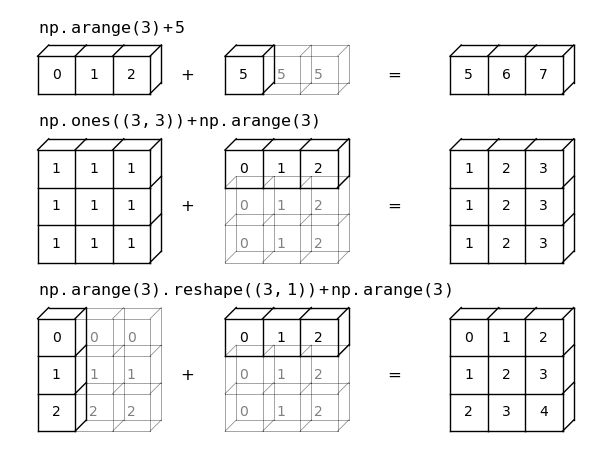

브로드캐스팅을 통해 PyTorch는 자동으로 텐서의 크기를 조정하여 연산을 가능하게 합니다.

브로드캐스팅이 적용 가능할 조건은 다음과 같습니다.

- Each tensor has at least one dimension.

- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

각 텐서는 적어도 하나의 차원을 가지고 있습니다.

마지막 차원부터 시작하여 차원 크기를 반복할 때,
차원 크기가 서로 같거나, 그 중 하나가 1이거나, 하나는 존재하지 않아야 합니다.

브로드캐스팅의 규칙을 따릅니다:

1. **차원 확장**: 두 텐서의 차원 수가 다를 경우, 더 작은 차원을 가진 텐서의 앞쪽(왼쪽)에 1의 차원을 추가하여 차원 수를 맞춥니다.
2. **차원 일치**: 두 텐서에서 각 차원의 크기가 다른 경우, 크기가 1인 차원은 다른 텐서의 해당 차원 크기와 일치하도록 확장됩니다. 크기가 1인 차원은 해당 차원에 대해 복사를 수행하여 확장됩니다.
3. **크기 불일치**: 만약 두 텐서의 어떤 차원의 크기가 서로 다르고 둘 중 하나도 1이 아니라면, 브로드캐스팅은 실패하고 오류가 발생합니다.

예를 들어, 크기가 **`[3, 1]`**인 텐서와 **`[1, 4]`**인 텐서가 있다고 가정해봅시다. 브로드캐스팅을 통해, 첫 번째 텐서는 두 번째 차원을 **`[1, 4]`**로 확장하여 **`[3, 4]`** 크기의 텐서가 됩니다. 마찬가지로, 두 번째 텐서는 첫 번째 차원을 **`[3, 1]`**로 확장하여 **`[3, 4]`** 크기의 텐서가 됩니다. 이제 두 텐서는 동일한 크기를 가지게 되어, 덧셈과 같은 요소별 연산이 가능해집니다.

브로드캐스팅은 코드를 단순화시키고 메모리 사용을 최적화하는데 유용하지만, 의도하지 않은 방식으로 작동할 수도 있으므로 주의해서 사용해야 합니다!

In [ ]:
import torch

# 2x1 크기의 텐서 생성
tensor1 = torch.tensor([[1],
                        [2]])

# 1x2 크기의 텐서 생성
tensor2 = torch.tensor([[3, 4]])

# 두 텐서의 덧셈 수행
# tensor1은 2x2로 확장되고, tensor2도 2x2로 확장되어 덧셈이 수행됨
result = tensor1 + tensor2

print(result)

tensor([[4, 5],
        [5, 6]])


### Pytorch 에서 모델을 함수(def) 가 아닌 클래스(class) 로 정의하는 이유

이번 과제에서는 모델과 학습과정 모두 함수로 구현했지만 pytorch 로 딥러닝 모델을 구현할 때에는 보통 클래스를 사용합니다!
클래스를 사용하면 모델의 구조와 동작을 더 유연하고 체계적으로 정의할 수 있으며, 객체 지향 프로그래밍의 장점을 활용할 수 있습니다.

그 장점을 자세하게 알아보자면,,

1. **모듈화와 재사용성**: 클래스를 사용하면 모델의 구성 요소(레이어, 매개변수 등)를 모듈화하고 재사용할 수 있습니다. 비슷한 구조를 가진 다양한 모델에서 동일한 레이어 또는 함수를 재사용할 수 있습니다.
2. **상태 관리**: 클래스는 상태(예: 가중치, 바이어스)를 저장하는 데 유용합니다. **nn.Module**을 상속받은 클래스는 내부 상태를 자동으로 관리하며, 가중치 초기화, 저장, 로딩 등을 쉽게 할 수 있습니다.
3. **코드의 가독성과 구조화**: 클래스를 사용하면 모델의 구조를 더 명확하고 이해하기 쉽게 만들 수 있습니다. 이는 특히 복잡한 모델에서 코드의 가독성과 유지보수성을 크게 향상시킵니다.
4. **내장 함수와 통합**: PyTorch의 **nn.Module** 클래스는 여러 유용한 내장 함수(예: **to()**, **eval()**, **train()**)를 제공합니다. 이러한 함수들은 모델의 파라미터를 CPU와 GPU 간에 이동시키거나, 모델을 학습 및 평가 모드로 전환하는 등의 작업을 간소화합니다.
5. **연산 그래프와 자동 미분**: PyTorch의 자동 미분 시스템인 Autograd는 연산 그래프를 기반으로 작동합니다. 클래스 내에서 정의된 **forward** 메소드는 이 연산 그래프를 구성하며, 이를 통해 역전파(backpropagation) 시 자동으로 미분 계산이 이루어집니다.
6. **확장성과 커스터마이징**: 클래스를 사용하면 기본 제공되는 레이어와 함수 외에도 사용자 정의 레이어와 함수를 쉽게 추가할 수 있습니다. 이는 복잡한 모델을 구축할 때 특히 유용합니다.

따라서, PyTorch에서 클래스를 사용하여 모델을 정의하는 것은 모델의 설계, 구현, 관리를 위한 가장 효과적인 방법 중 하나입니다!

## torch.no_grad(), requires_grad, detach() 의 차이

torch.no_grad(), requires_grad, detach() 는 gradient 계산을 막는다는 공통된 역할을 합니다. 이 세 코드의 차이는 무엇일지 알아봅시다!

### **1. torch.no_grad()**

- **사용 상황:** **torch.no_grad()**는 그래디언트 계산이 필요 없는 경우에 사용됩니다. 이는 주로 모델을 평가하거나 추론(inference)할 때 사용됩니다.
- **역할:** 이 블록 내에서 수행되는 모든 연산은 그래디언트 추적이나 저장을 하지 않습니다.
- **예시:** 모델의 가중치를 업데이트하지 않고 출력만을 계산할 때 사용합니다.
    
    ```python
    with torch.no_grad():
        for input, target in dataset:
            output = model(input)
    ```
    

### **2. requires_grad**

- **사용 상황:** **requires_grad**는 텐서에 대한 그래디언트 계산을 활성화하거나 비활성화할 때 사용됩니다.
- **역할:** **requires_grad=True**로 설정된 텐서는 연산을 추적하며, 그래디언트 계산에 포함됩니다.
- **예시:** 특정 텐서에 대해 그래디언트를 계산하고자 할 때 사용합니다.
    
    ```python
    x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
    y = x * 2
    z = y.mean()
    z.backward()  # 여기서 x에 대한 그래디언트가 계산됩니다.
    ```
    

### **3. detach()**

- **사용 상황:** **detach()**는 기존 계산 그래프로부터 텐서를 분리하여 그래디언트 계산에서 제외할 때 사용됩니다.
- **역할:** 분리된 텐서는 동일한 데이터를 공유하지만, 그래디언트 계산에는 참여하지 않습니다.

- **예시:** 기존 텐서의 값은 유지하되, 그래디언트 계산에는 참여시키고 싶지 않을 때 사용합니다.
    
    ```python
    x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
    y = x * 2
    z = y.detach()  # z는 y와 동일한 값을 가지지만, 그래디언트 계산에는 참여하지 않습니다.
    ```
    

### **서로 대체 가능한 경우**

- **no_grad()와 detach():** 둘 다 그래디언트 계산을 방지합니다. **detach()**는 개별 텐서에 대해 사용되며, **no_grad()**는 코드 블록에 대해 그래디언트 계산을 방지합니다. 그러나 **`detach()`**는 새로운 텐서를 생성하는 반면, **no_grad()**는 새로운 텐서를 생성하지 않습니다.

- **requires_grad와 no_grad():** **requires_grad=False**로 설정하면 특정 텐서에 대한 그래디언트 추적을 방지할 수 있으며, **no_grad()**는 코드 블록 전체에 대해 그래디언트 추적을 방지합니다.

# 과제 답안

In [ ]:
!pip install matplotlib_inline

In [ ]:
!pip install d2l

  Using cached matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [ ]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root = "../data", train = True, transform=trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(
    root = "../data", train = False, transform=trans, download=True)

In [ ]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [ ]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
def get_fashion_mnist_labels(labels):
  """Fashion-MNIST를 위한 텍스트라벨을 리턴"""
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]

In [ ]:
# visualize example

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  """이미지 리스트 플롯그리기"""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize = figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      # Tensor Image
      ax.imshow(img.numpy())
    else:
      # PIL Image
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes


In [ ]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
d2l 1.0.3 requires matplotlib==3.7.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.9.3 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.1.3 which is incompatibl

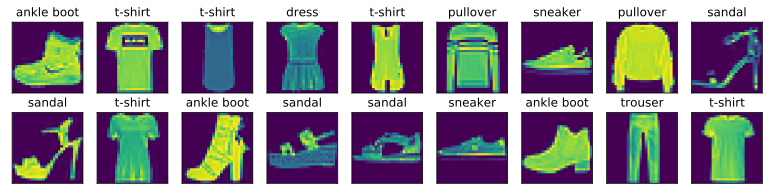

In [ ]:
# training dataset 가져오기
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18) ))
show_images(X.reshape(18,28,28), 2, 9, titles = get_fashion_mnist_labels(y));

In [ ]:
# Reading a Minibatch
batch_size = 256

def get_dataloader_workers():
  """Use 4 processes to read the data."""
  return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers = get_dataloader_workers())

In [ ]:
# training data 읽는 시간 체크

timer = d2l.Timer()
for X, y in train_iter:
  continue
f'{timer.stop():.2f}.sec'

'1.86.sec'

In [ ]:
# Putting All Things Together

def load_data_fashion_mnist(batch_size, resize=None):
  """Fashion-MNIST dataset 을 다운로드하고 memory로 로드"""
  trans = [transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(
      root = "../data", train=True, transform=trans, download=True)
  mnist_test = torchvision.datasets.FashionMNIST(
      root="../data", train=False, transform=trans, download=True)
  return(data.DataLoader(mnist_train, batch_size, shuffle=True,
                         num_workers=get_dataloader_workers()),
         data.DataLoader(mnist_test, batch_size, shuffle=False,
                         num_workers=get_dataloader_workers()))

In [ ]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## 3.6 Implementation of Softmax Regression from Scratch

**코드 한 줄 한 줄이 어떤 이유로 쓰였는지 씹어보며 공부해보세요! 😀**

In [ ]:
import torch
from IPython import display
from d2l import torch as d2l

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
# image flatten to vectors of length 784.
# 각 pixel 위치를 feature로 봄
# class 가 10개니까 아웃풋 dimension이 10
# Gaussian 노이즈로 W 초기값 설정
# 0으로 b 초기값 설정

num_inputs = 784
num_outputs = 10
W = torch.normal(0, 0.01, size = (num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad = True)

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0,5.0,6.0]])
X.sum(0, keepdim = True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [ ]:
# softmax 함수를 구현해보세요.

def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdim = True)
  return X_exp / partition

In [ ]:
X = torch.normal(0, 1, (2,5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1254, 0.0522, 0.0432, 0.2535, 0.5257],
         [0.1245, 0.1320, 0.1700, 0.2505, 0.3229]]),
 tensor([1., 1.]))

In [ ]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [ ]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0,1], y]

tensor([0.1000, 0.5000])

In [ ]:
# cross-entropy loss function을 구현해보세요.

def cross_entropy(y_hat, y):
  return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [ ]:
def accuracy(y_hat, y):
  """correct prediction 수를 계산"""
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis = 1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

In [ ]:
accuracy(y_hat, y) / len(y)

0.5

In [ ]:
def evaluate_accuracy(net, data_iter):
    """모델 정확도 계산"""
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2)

    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
class Accumulator:
    """n 개 변수 합 축적"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
evaluate_accuracy(net, test_iter)

0.1576

In [ ]:
def train_epoch(net, train_iter, loss, updater):
    """training loop"""
    # Set the model to training model
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, number of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
class Animator:
    """애니메이션으로 데이터 플롯팅"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


In [ ]:
def train(net, train_iter, test_iter, loss, num_epochs, updater):
    """모델 학습"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc


In [ ]:
lr = 0.1

def updater(batch_size):
  return d2l.sgd([W, b], lr, batch_size)

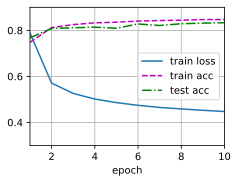

In [ ]:
num_epochs = 10
train(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

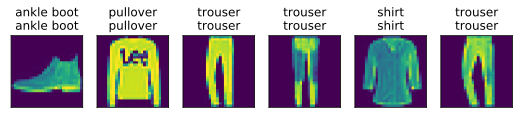

In [ ]:
def predict(net, test_iter, n=6):
  for X, y in test_iter:
    break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis = 1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(
      X[0:n].reshape((n, 28, 28)), 1 , n, titles = titles[0:n])
predict(net, test_iter)

## 세션 때 배운 코드를 복습해봐요 😀

**강의자료 보지않고 빈 칸 채워보기!**

# Numpy

### data generation

In [ ]:
import numpy as np

true_b = 1
true_w = 2

N = 100

np.random.seed(42)
x = np.random.rand(N,1)  # Uniform
epsilon = (0.1 * np.random.randn(N,1))  # standard normal dist  # noise
y = true_b + true_w * x + epsilon  # data genneration

### Train-Validation Split

In [ ]:
# Shuffles the indices
idx = np.arange(N)
split_index = int(N * 0.8)

train_idx = idx[:split_index]
val_idx = idx[split_index:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

### Gradient Descent for Linear Regression

In [ ]:
# 실행시간을 측정해주는 Decorator 입니다.

import time
def timer(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    computation_time = end_time - start_time
    print(f"Execution time of {func.__name__}: {computation_time} seconds")
    return result
  return wrapper

In [ ]:
@timer
def train_model_numpy(lr = 0.1, epochs = 1000):
  # Initialize parameters
  b = np.random.randn(1)
  w = np.random.randn(1)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train
    error = (y_hat - y_train)
    mse_loss = np.mean(error ** 2)

    # Gradient computation
    b_grad = 2 * np.mean(error)
    w_grad = 2 * np.mean(x_train * error)
    b = b - lr * b_grad
    w = w - lr * w_grad
  return b, w


In [ ]:
b, w = train_model_numpy()
print("b_estimate:{}, w_estimate:{}".format(b,w))

Execution time of train_model_numpy: 0.031177282333374023 seconds
b_estimate:[1.02341376], w_estimate:[1.93680725]


# Pytorch

### Data Generation

In [ ]:
import torch

# create tensor at CPU:
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

# create tensor ar GPU:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)


### Gradient Descent

In [ ]:
@timer
def train_model_torch(lr = 0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
  w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    error = (y_hat - y_train_tensor)
    mse_loss = torch.mean(error ** 2)
    # Gradient computation and descent
    mse_loss.backward()
    with torch.no_grad(): # 경사 하강법 할 땐 auto grad 끄고 하는 게 좋죠!
      b -= lr * b.grad  # in-place operation 써줘야합니다!
      w -= lr * w.grad
    b.grad.zero_() # gradient 초기화 시켜줘야해요. 안 하면 누적합으로 계산하기 때문에!
    w.grad.zero_()
  return b, w

In [ ]:
b, w = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b,w))

Execution time of train_model_torch: 0.7760624885559082 seconds
b_estimate:tensor([1.0234], device='cuda:0', requires_grad=True), w_estimate:tensor([1.9368], device='cuda:0', requires_grad=True)


**optimizer 를 사용해서 gradient descent 를 하는 방법도 있어요!**

In [ ]:
import torch.optim as optim
import torch.nn as nn

@timer
def train_model_torch(lr = 0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
  w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
  parameters = [b, w]
  optimizer = optim.SGD(parameters, lr = lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient computation and descent
    loss.backward()
    optimizer.step() # 경사하강법 연산, step 한 번을 밟는다!
    optimizer.zero_grad()
  return b, w

In [ ]:
b, w = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b,w))

Execution time of train_model_torch: 2.105813980102539 seconds
b_estimate:tensor([1.0234], device='cuda:0', requires_grad=True), w_estimate:tensor([1.9368], device='cuda:0', requires_grad=True)
